In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import random
import statistics as stats
import os
import numpy as np
from sklearn.linear_model import LinearRegression
import seaborn as sns
from scipy import stats as statst

In [2]:
##Check the data
expressiondf = pd.read_csv("/Users/reneenapoliello/Desktop/Old Material/expression.csv")
analyticsdf = pd.read_csv("/Users/reneenapoliello/Desktop/Old Material/analytics.csv")

In [3]:
expressiondf.head()

,Gene ID,Gene Name,Design Element,'mbf1c mutant' vs 'wild type' at '0 minute'.foldChange,'mbf1c mutant' vs 'wild type' at '0 minute'.pValue,'mbf1c mutant' vs 'wild type' at '0 minute'.tStat,'mbf1c mutant' vs 'wild type' at '20 minute'.foldChange,'mbf1c mutant' vs 'wild type' at '20 minute'.pValue,'mbf1c mutant' vs 'wild type' at '20 minute'.tStat,'mbf1c mutant' vs 'wild type' at '60 minute'.foldChange,'mbf1c mutant' vs 'wild type' at '60 minute'.pValue,'mbf1c mutant' vs 'wild type' at '60 minute'.tStat
0,AT1G01040,DCL1,261584_at,0.1,0.975063,0.299774,NaN,NaN,NaN,NaN,NaN,NaN
1,AT1G01060,LHY,261569_at,-1.2,0.953144,-1.715960,-0.6,0.877971,-0.776838,-1.4,0.409555,-2.333233
2,AT1G01080,AT1G01080,261577_at,0.1,0.956045,0.763892,NaN,NaN,NaN,NaN,NaN,NaN
3,AT1G01100,RPP1A,261578_at,0.1,0.953144,0.905511,NaN,NaN,NaN,NaN,NaN,NaN
4,AT1G01120,KCS1,261570_at,-0.1,0.961737,-0.506495,NaN,NaN,NaN,0.1,0.994204,0.133799


In [4]:
analyticsdf.head()

,Gene ID,Gene Name,Design Element,'mbf1c mutant' vs 'wild type' at '0 minute'.p-value,'mbf1c mutant' vs 'wild type' at '0 minute'.t-statistic,'mbf1c mutant' vs 'wild type' at '0 minute'.log2foldchange,'mbf1c mutant' vs 'wild type' at '20 minute'.p-value,'mbf1c mutant' vs 'wild type' at '20 minute'.t-statistic,'mbf1c mutant' vs 'wild type' at '20 minute'.log2foldchange,'mbf1c mutant' vs 'wild type' at '60 minute'.p-value,'mbf1c mutant' vs 'wild type' at '60 minute'.t-statistic,'mbf1c mutant' vs 'wild type' at '60 minute'.log2foldchange
0,AT1G01010,NAC001,261585_at,0.987920,0.130730,0.0,NaN,0.492201,0.1,NaN,-1.498147,-0.2
1,AT1G01030,NGA3,261568_at,0.996204,0.045672,0.0,NaN,4.734962,0.7,NaN,-1.527729,-0.3
2,AT1G01040,DCL1,261584_at,0.975063,0.299774,0.1,NaN,1.597496,0.3,NaN,-1.193688,-0.3
3,AT1G01050,PPA1,261579_at,0.997101,0.032847,0.0,NaN,-1.248513,-0.2,NaN,-0.188672,0.0
4,AT1G01060,LHY,261569_at,0.953144,-1.715960,-1.2,0.877971,-0.776838,-0.6,0.409555,-2.333233,-1.4


In [8]:
##Find out at which time of data collection has the most significantly differentially expressed genes
a = len(analyticsdf["Gene ID"].loc[analyticsdf["'mbf1c mutant' vs 'wild type' at '0 minute'.p-value"] < 0.05])
b = len(analyticsdf["Gene ID"].loc[analyticsdf["'mbf1c mutant' vs 'wild type' at '20 minute'.p-value"] < 0.05])
c = len(analyticsdf["Gene ID"].loc[analyticsdf["'mbf1c mutant' vs 'wild type' at '60 minute'.p-value"] < 0.05])
print("At 0 min is",a)
print("At 20 min is",b)
print("At 60 min is",c)

At 0 min is 3
At 20 min is 43
At 60 min is 9


In [9]:
##At the most significant time, 20 min, merge the two tables
mergedf = pd.merge(expressiondf, analyticsdf, left_on = "Gene ID", right_on = "Gene ID")
sigmerge = mergedf.loc[mergedf["'mbf1c mutant' vs 'wild type' at '20 minute'.p-value"] < 0.05]
sigmerge.head()

,Gene ID,Gene Name_x,Design Element_x,'mbf1c mutant' vs 'wild type' at '0 minute'.foldChange,'mbf1c mutant' vs 'wild type' at '0 minute'.pValue,'mbf1c mutant' vs 'wild type' at '0 minute'.tStat,'mbf1c mutant' vs 'wild type' at '20 minute'.foldChange,'mbf1c mutant' vs 'wild type' at '20 minute'.pValue,'mbf1c mutant' vs 'wild type' at '20 minute'.tStat,'mbf1c mutant' vs 'wild type' at '60 minute'.foldChange,...,Design Element_y,'mbf1c mutant' vs 'wild type' at '0 minute'.p-value,'mbf1c mutant' vs 'wild type' at '0 minute'.t-statistic,'mbf1c mutant' vs 'wild type' at '0 minute'.log2foldchange,'mbf1c mutant' vs 'wild type' at '20 minute'.p-value,'mbf1c mutant' vs 'wild type' at '20 minute'.t-statistic,'mbf1c mutant' vs 'wild type' at '20 minute'.log2foldchange,'mbf1c mutant' vs 'wild type' at '60 minute'.p-value,'mbf1c mutant' vs 'wild type' at '60 minute'.t-statistic,'mbf1c mutant' vs 'wild type' at '60 minute'.log2foldchange
662,AT1G13260,RAV1,259364_at,0.2,0.959969,0.554812,1.3,0.042529,4.132186,1.4,...,259364_at,0.959969,0.554812,0.2,0.042529,4.132186,1.3,0.088950,4.676342,1.4
709,AT1G14200,AT1G14200,262656_at,-0.6,0.953144,-1.540462,-1.7,0.002131,-10.021185,-1.7,...,262656_at,0.953144,-1.540462,-0.6,0.002131,-10.021185,-1.7,0.309659,-2.703637,-1.7
1296,AT1G25400,AT1G25400,255733_at,-0.2,0.957570,-0.746075,1.2,0.041009,4.242879,1.4,...,255733_at,0.957570,-0.746075,-0.2,0.041009,4.242879,1.2,0.171776,3.535370,1.4
1303,AT1G25550,HHO3,255734_at,-0.1,0.962313,-0.483767,1.3,0.031477,4.728363,NaN,...,255734_at,0.962313,-0.483767,-0.1,0.031477,4.728363,1.3,NaN,3.380388,0.5
1304,AT1G25560,TEM1,255742_at,0.2,0.954459,0.817401,1.6,0.010150,7.213656,1.3,...,255742_at,0.954459,0.817401,0.2,0.010150,7.213656,1.6,0.302717,2.792268,1.3


In [10]:
##import info dataset for all genes
pd.set_option('max_colwidth', 800) 
GOdf = pd.read_csv("/Users/reneenapoliello/Desktop/Old Material/Pythonwork2020/PantherGO4.csv")

In [11]:
GOdf.head()

,Panther ID,Gene ID,PANTHER Family/Subfamily,PANTHER Protein Class,GO Database MF Complete,GO Database BP Complete,GO Database CC Complete,Unnamed: 7,Unnamed: 8
0,ARATH|TAIR=locus=2135129|UniProtKB=O65638,AT4G36010,PATHOGENESIS-RELATED THAUMATIN SUPERFAMILY PROTEIN (PTHR31048:SF125),-,molecular_function,defense response,extracellular region; anchored component of membrane,NaN,NaN
1,ARATH|TAIR=locus=2046006|UniProtKB=Q9SIU5,AT2G20670,EXPRESSED PROTEIN (PTHR31579:SF37),-,-,-,nucleus; chloroplast,NaN,NaN
2,ARATH|TAIR=locus=2091762|UniProtKB=Q9LV52,AT3G24520,HEAT STRESS TRANSCRIPTION FACTOR C-1 (PTHR10015:SF332),winged helix/forkhead transcription factor,RNA polymerase II cis-regulatory region sequence-specific DNA binding; DNA-binding transcription factor activity; protein binding,regulation of transcription by RNA polymerase II; cellular response to heat,nucleus; host cell nucleus,NaN,NaN
3,ARATH|TAIR=locus=2079691|UniProtKB=Q9SRT1,AT3G07350,F21O3.6 PROTEIN (PTHR31579:SF44),-,-,cellular response to hypoxia,mitochondrion,NaN,NaN
4,ARATH|TAIR=locus=2097870|UniProtKB=Q9SB04,AT3G48100,TWO-COMPONENT RESPONSE REGULATOR ARR5 (PTHR43874:SF94),winged helix/forkhead transcription factor,phosphorelay response regulator activity; protein binding,regulation of transcription; DNA-templated; circadian rhythm; response to cytokinin; cytokinin-activated signaling pathway,nucleus; cytoplasm,NaN,NaN


In [12]:
##make final table
finaldf = pd.merge(sigmerge, GOdf, left_on = "Gene ID", right_on = "Gene ID")
finaldf.head()

,Gene ID,Gene Name_x,Design Element_x,'mbf1c mutant' vs 'wild type' at '0 minute'.foldChange,'mbf1c mutant' vs 'wild type' at '0 minute'.pValue,'mbf1c mutant' vs 'wild type' at '0 minute'.tStat,'mbf1c mutant' vs 'wild type' at '20 minute'.foldChange,'mbf1c mutant' vs 'wild type' at '20 minute'.pValue,'mbf1c mutant' vs 'wild type' at '20 minute'.tStat,'mbf1c mutant' vs 'wild type' at '60 minute'.foldChange,...,'mbf1c mutant' vs 'wild type' at '60 minute'.t-statistic,'mbf1c mutant' vs 'wild type' at '60 minute'.log2foldchange,Panther ID,PANTHER Family/Subfamily,PANTHER Protein Class,GO Database MF Complete,GO Database BP Complete,GO Database CC Complete,Unnamed: 7,Unnamed: 8
0,AT1G13260,RAV1,259364_at,0.2,0.959969,0.554812,1.3,0.042529,4.132186,1.4,...,4.676342,1.4,ARATH|TAIR=locus=2205319|UniProtKB=Q9ZWM9,AP2/ERF AND B3 DOMAIN-CONTAINING TRANSCRIPTION FACTOR RAV1 (PTHR31140:SF76),-,transcription regulatory region sequence-specific DNA binding; DNA binding; DNA-binding transcription factor activity,response to brassinosteroid; negative regulation of flower development; negative regulation of transcription; DNA-templated; leaf development; lateral root development; cellular response to hypoxia,nucleus,NaN,NaN
1,AT1G14200,AT1G14200,262656_at,-0.6,0.953144,-1.540462,-1.7,0.002131,-10.021185,-1.7,...,-2.703637,-1.7,ARATH|TAIR=locus=2035843|UniProtKB=Q9XI67,RING/U-BOX SUPERFAMILY PROTEIN (PTHR15710:SF45),-,ubiquitin protein ligase activity,defense response; incompatible interaction; protein ubiquitination; cellular response to hypoxia,nucleus; cytoplasm,NaN,NaN
2,AT1G25400,AT1G25400,255733_at,-0.2,0.957570,-0.746075,1.2,0.041009,4.242879,1.4,...,3.535370,1.4,ARATH|TAIR=locus=2031220|UniProtKB=Q9C6L0,BNAANNG41370D PROTEIN (PTHR36715:SF1),-,molecular_function,biological_process,nucleus,NaN,NaN
3,AT1G25550,HHO3,255734_at,-0.1,0.962313,-0.483767,1.3,0.031477,4.728363,NaN,...,3.380388,0.5,ARATH|TAIR=locus=2031210|UniProtKB=Q9FPE8,TRANSCRIPTION FACTOR HHO3 (PTHR31003:SF24),-,DNA binding; DNA-binding transcription factor activity,regulation of transcription; DNA-templated; cellular response to hypoxia,nucleus; mitochondrion,NaN,NaN
4,AT1G25560,TEM1,255742_at,0.2,0.954459,0.817401,1.6,0.010150,7.213656,1.3,...,2.792268,1.3,ARATH|TAIR=locus=2031185|UniProtKB=Q9C6M5,AP2/ERF AND B3 DOMAIN-CONTAINING TRANSCRIPTION REPRESSOR TEM1 (PTHR31140:SF1),-,DNA binding; DNA-binding transcription factor activity; protein binding,regulation of transcription; DNA-templated; ethylene-activated signaling pathway; photoperiodism; flowering; cellular response to hypoxia,nucleus,NaN,NaN


In [13]:
##make sure you are using string
finaldf['GO Database BP Complete'] = finaldf['GO Database BP Complete'].astype('string')

In [14]:
##make a function to find genes that have descriptions related to heat
def isheat(df):
  if ("heat" in df['GO Database BP Complete']) or ("cold" in df['GO Database BP Complete']):
    value = "yes"
  else:
    value = "no"
  return value

In [15]:
finaldf["heat"] = finaldf.apply(isheat, axis = 1)

In [16]:
numheat = len(finaldf["Gene ID"].loc[finaldf["heat"]=="yes"])
numnone = len(finaldf["Gene ID"].loc[finaldf["heat"]=="no"])
print("Number of genes related to heat is",numheat, "and number of remaining genes are", numnone)

Number of genes related to heat is 7 and number of remaining genes are 36


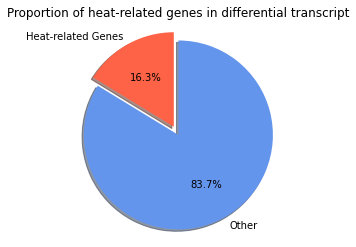

In [17]:
##make a chart showing this proportion
labels = 'Heat-related Genes', 'Other'
sizes = [numheat, numnone]
explode = (0.1, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, colors = ["tomato", "cornflowerblue"])
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Proportion of heat-related genes in differential transcript")

plt.show()

In [18]:
##test this proportion against the proportion of all genes related to heat
##population proportion taken from Gene Ontology
import statsmodels
import numpy as np
from statsmodels.stats.proportion import proportions_ztest
atheatgenes = 388
atcoldgenes = 281
attotal = 27000
nullpr = (atheatgenes + atcoldgenes)/attotal
count = numheat
nobs = numheat + numnone
value = nullpr
stat, pval = proportions_ztest(count, nobs, value)
pval = '{0:0.3f}'.format(pval)
if float(pval) < 0.05:
  print("the data rejects the null hypothesis")
else:
  print("the data does not reject the null")
print(pval)

the data rejects the null hypothesis
0.014


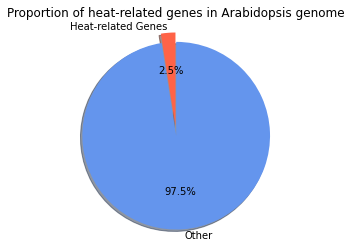

In [20]:
##compare it to population proportion
labels = 'Heat-related Genes', 'Other'
sizes = [atheatgenes + atcoldgenes, attotal- (atheatgenes + atcoldgenes)]
explode = (0.1, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, colors = ["tomato", "cornflowerblue"], labeldistance = 1.07)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Proportion of heat-related genes in Arabidopsis genome")

plt.show()